In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/home/kirant/thinglap/NSHM-projects/nzdistrseismod/')
import src.grids.grids as grids
import src.zones.tzones as zones
import numpy as np

### This is fanstastic!!

Write out/save interface configurations, which include interp2d objects.


In [3]:
# try save interface_configs
interface_configs = zones.get_interface_configs()
np.save('interface_configs.npy', interface_configs)


/home/kirant/miniconda3/envs/oqthingy/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=41,41 m=1504 fp=5.591254 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/kirant/miniconda3/envs/oqthingy/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=22,22 m=399 fp=51.228660 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


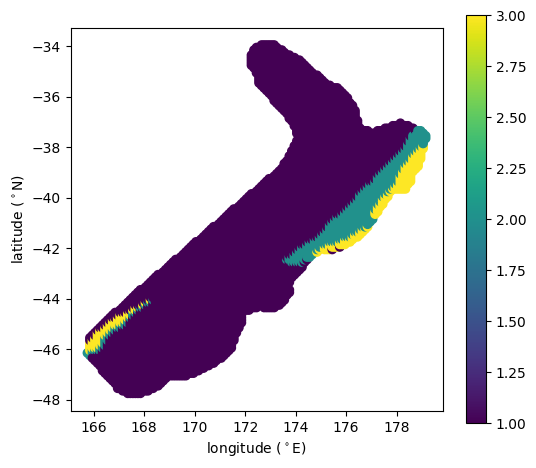

In [7]:
# check and show how to reead the object 

interface_configs = np.load('interface_configs.npy', allow_pickle=True)[()]


glon, glat = grids.get_sample_grid(file = '../grids/samplegrid.txt')
gdep= [15]*len(glon)

regime = []
for i in range(len(glon)):
    glon[i], glat[i]
    rgm = zones.get_nzregime(glon[i], glat[i], gdep[i], \
                          interface_configs = interface_configs)
    if rgm=='slab':
        regime.append(3)
    elif rgm=='interface':
        regime.append(2)
    else:
        regime.append(1)

#print(regime)
plt.figure(figsize=(6, 6), dpi=100);
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude ($^\circ$E)');
plt.ylabel('latitude ($^\circ$N)');
plt.scatter(glon, glat, c=regime)
plt.colorbar(shrink=0.9);